In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
from deficit_defs import *

Splikes version  0.1.4
Plasticnet version  0.1.12
macOS-14.4.1-arm64-arm-64bit
Base Image File: asdf/bbsk081604_all_scale2.asdf


In [ ]:
def inputs_to_images(X,buffer=5,scale_each_patch=False):
    ims=[]
    vmin=X.min()
    vmax=X.max()
    
    rf_size=int(np.sqrt(X.shape[1]/2))
    
    for xx in X:
        xx1=xx[:rf_size*rf_size].reshape(rf_size,rf_size)
        xx2=xx[rf_size*rf_size:].reshape(rf_size,rf_size)
        if scale_each_patch:
            vmax=max([xx1.max(),xx2.max()])
            vmin=max([xx1.min(),xx2.min()])
        
        im=np.concatenate((xx1,np.ones((rf_size,buffer))*vmax,xx2),axis=1)   
        ims.append(im)
        
    return ims


Sim Time Elapsed...0.96 s


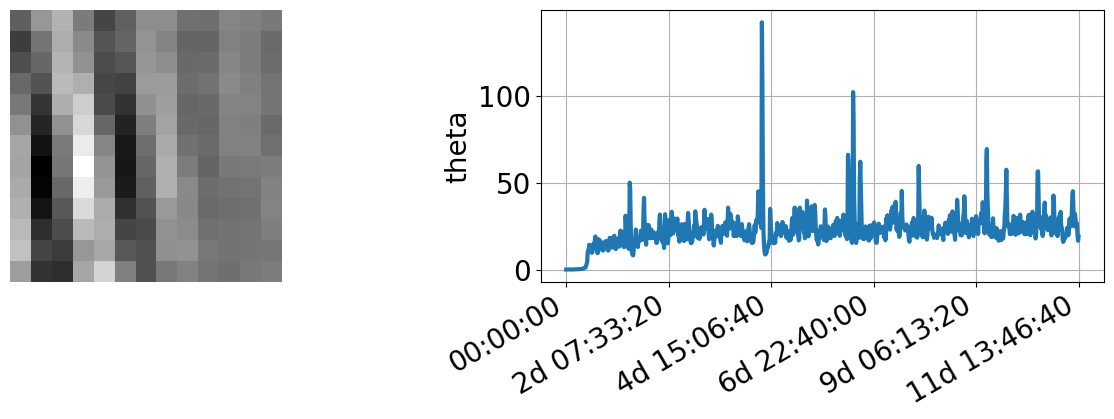

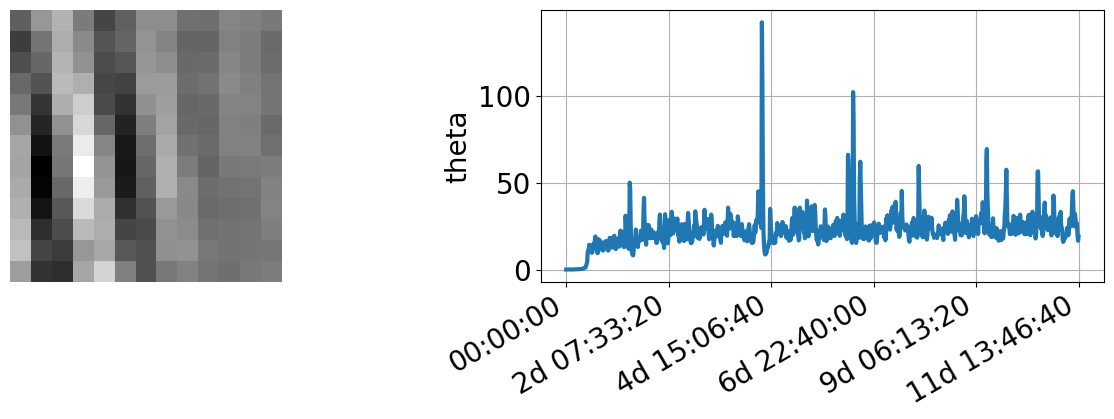

In [ ]:
pre=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',rf_size=13,verbose=False)
post=pn.neurons.linear_neuron(1)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.05,.05])
c.eta=5e-6
c.tau=1000

sim=pn.simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

pn.run_sim(sim,[pre,post],[c],display_hash=False)

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c])

Sim Time Elapsed...2.76 s


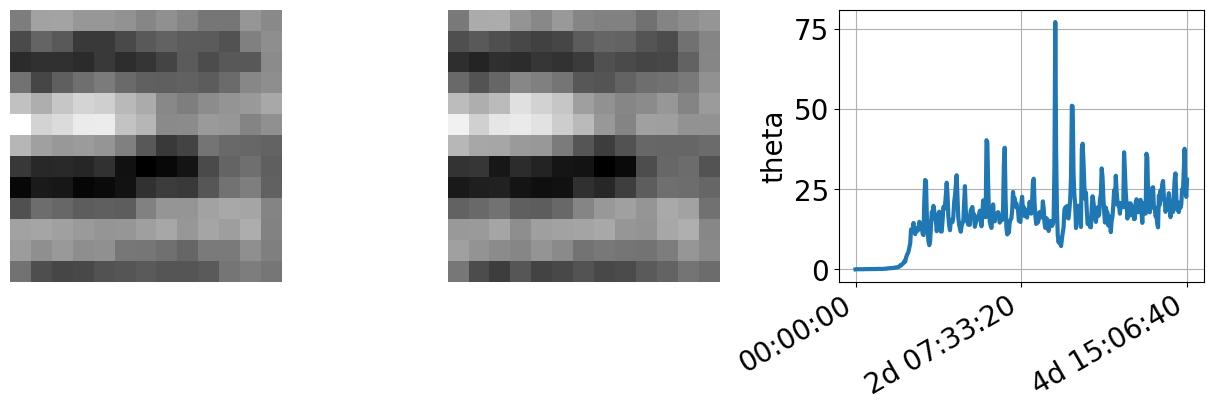

In [ ]:
pre1=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',
                               rf_size=13,verbose=False)

pre2=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',
                               rf_size=13,
                               other_channel=pre1,
                              verbose=False)


sigma=0.1
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

sigma=0.1
pre2+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1+pre2  # make a channel


post=pn.neurons.linear_neuron(1)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.05,.05])
c.eta=2e-6
c.tau=1000

sim=pn.simulation(1000*400)
sim.monitor(c,['weights','theta'],1000)

pn.run_sim(sim,[pre,post],[c],display_hash=False)

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c]);

use other channel: 0
use other channel: 1
In Update pattern neuronpre1
<class 'plasticnet.neurons.pattern_neuron.natural_images'>
IRead 118 images from asdf/bbsk081604_all_dog.asdf
[465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630]

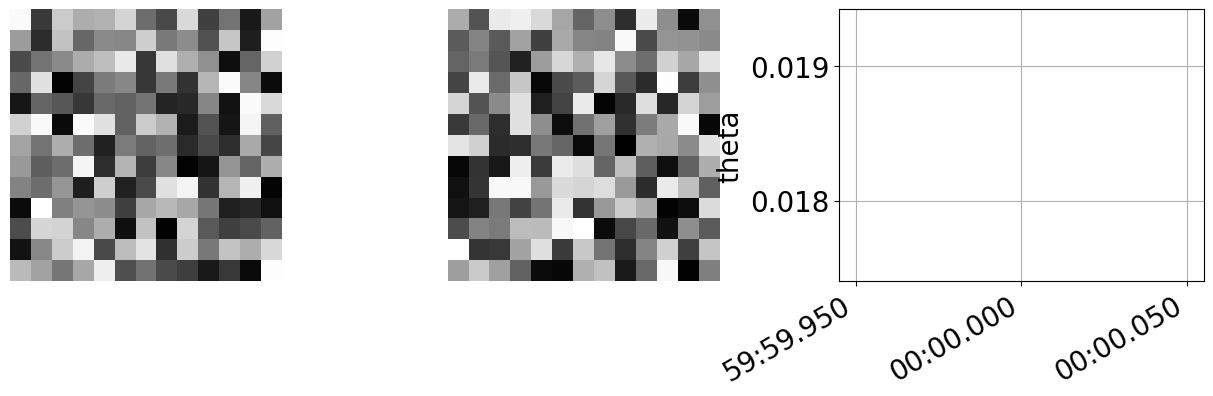

In [ ]:
pre1=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',
                               rf_size=13,verbose=True)
pre1.name="pre1"

pre2=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',
                               rf_size=13,
                               other_channel=pre1,
                              verbose=True)
pre2.name="pre2"

sigma=0.1
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

sigma=0.1
pre2+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1+pre2  # make a channel


post=pn.neurons.linear_neuron(1)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.05,.05])
c.eta=5e-6
c.tau=1000

sim=pn.simulation(3)
sim.monitor(c,['weights','theta'],1000)
sim.monitor(pre,['output'],1)


pn.run_sim(sim,[pre,post],[c],display_hash=False)

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c]);

In [ ]:
m=sim.monitors['output']
t,X=m.arrays()

In [ ]:
pre2.other

AttributeError: 'plasticnet.neurons.pattern_neuron.natural_images' object has no attribute 'other'

In [ ]:

for i in range(25):
    subplot(5,5,i+1)
    grid(False)
    gca().set_xticks([])
    gca().set_yticks([])
    imshow(im[i+1],cmap='gray')

In [ ]:
dir(pre1)

In [ ]:
pre2.use_other_channel